---
# Análise comparativa de modelos
Conjunto de dads: Cars Data From 1970 to 2024 (Modelo de carros de 1970 a 2024)

Cientistas de dados:

*   Maria Eduarda Justino
https://br.linkedin.com/in/meduardajustino
madujustinostudies@gmail.com

*   David William A. Oliveira
https://www.linkedin.com/in/david-matizu/
davidwillamagimario@gmail.com

*   Fernando Filho
l340fernando@gmail.com
https://www.linkedin.com/in/fernandods0/


*   Jamile Moreira
https://www.linkedin.com/in/jamile-ms-moreira
jamile.m2002@gmail.com

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# pipelines e transformadores
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer

# codificação de variáveis
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer

# normalização
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# dados faltantes
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# modelagem
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, KFold, ShuffleSplit, RandomizedSearchCV

In [ ]:
# @title Leitura do conjunto e criação do dicionário de dados


df = pd.read_csv(
    "https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/cars-90000.csv"
)


# @title Dicionário de dados

df_dict = pd.DataFrame([
    {
        "variavel": "model",
        "descricao": "O modelo do carro",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },
    {
        "variavel": "year",
        "descricao": "Ano de fabricação do carro",
        "tipo": "Qualitativa",
        "subtipo": "Ordinal",
    },
    {
        "variavel": "price",
        "descricao": "O valor do veículo.",
        "tipo": "Quantitativa",
        "subtipo": "Contínua",
    },
    {
        "variavel": "transmission",
        "descricao": "Se é manual, semi ou automático.",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },
    {
        "variavel": "mileage",
        "descricao": "A quilometragem do carro.",
        "tipo": "Quantitativa",
        "subtipo": "Contínua",
    },
    {
        "variavel": "fuelType",
        "descricao": "O tipo de combustível usado pelo carro.",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },
    {
        "variavel": "tax",
        "descricao": "A taxa de imposto aplicável ao carro.",
        "tipo": "Quantitativa",
        "subtipo": "Contínua",
    },
    {
       "variavel": "mpg",
        "descricao": "A eficiência de kilometros por galão do carro.",
        "tipo": "Quantitativa",
        "subtipo": "Contínua",
    },
    {
        "variavel": "engineSize",
        "descricao": "O tamanho do motor do carro.",
        "tipo": "Quantitativa",
        "subtipo": "Contínua",
    },
    {
        "variavel": "Manufacturer",
        "descricao": "O fabricante do carro.",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    }
])

df_dict

,variavel,descricao,tipo,subtipo
0,model,O modelo do carro,Qualitativa,Nominal
1,year,Ano de fabricação do carro,Qualitativa,Ordinal
2,price,O valor do veículo.,Quantitativa,Contínua
3,transmission,"Se é manual, semi ou automático.",Qualitativa,Nominal
4,mileage,A quilometragem do carro.,Quantitativa,Contínua
5,fuelType,O tipo de combustível usado pelo carro.,Qualitativa,Nominal
6,tax,A taxa de imposto aplicável ao carro.,Quantitativa,Contínua
7,mpg,A eficiência de kilometros por galão do carro.,Quantitativa,Contínua
8,engineSize,O tamanho do motor do carro.,Quantitativa,Contínua
9,Manufacturer,O fabricante do carro.,Qualitativa,Nominal


In [ ]:
# @title Seleção de variáveis e separação de entradas e saídas

target_variable = ['price']
useless_variables =  (
    df_dict
    .query("tipo == 'inútil'")
    .variavel
    .to_list()
)
unused_variables = useless_variables + target_variable
nominal_variables = (
    df_dict
    .query("subtipo == 'Nominal' and variavel not in @unused_variables")
    .variavel
    .to_list()
)
ordinal_variables = (
    df_dict
    .query("subtipo == 'Ordinal' and variavel not in @unused_variables")
    .variavel
    .to_list()
)
continuous_variables = (
    df_dict
    .query("subtipo == 'Contínua' and variavel not in @unused_variables")
    .variavel
    .to_list()
)
discrete_variables = (
    df_dict
    .query("subtipo == 'Discreta' and variavel not in @unused_variables")
    .variavel
    .to_list()
)

X = df.drop(columns=unused_variables)
y = df[target_variable]

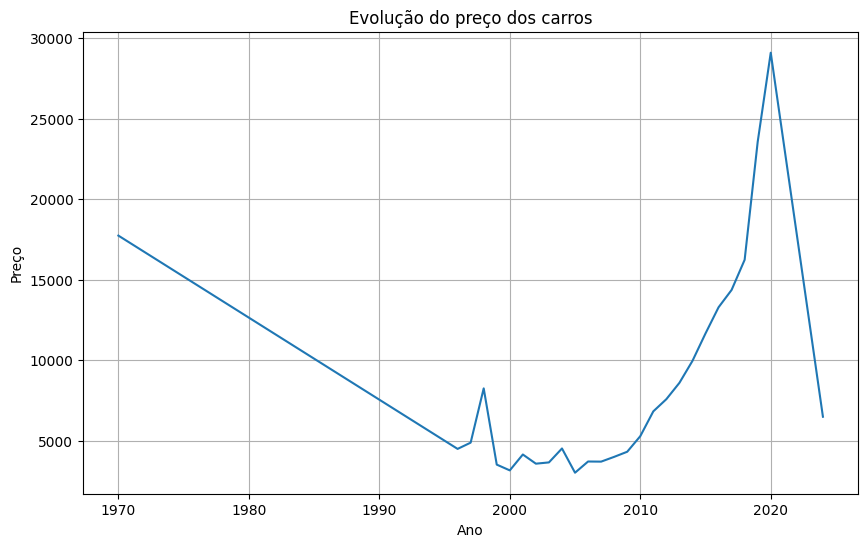

In [ ]:
price_by_year = df.groupby('year')['price'].mean()
plt.figure(figsize=(10, 6))
plt.plot(price_by_year.index, price_by_year.values)
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.title('Evolução do preço dos carros')
plt.grid(True)
plt.show()

O preço médio de 2024 caiu para cerca de R$ 6.495, enquanto 2020 tem média de R$ 29.107. Isso pode indicar:

Poucos carros registrados com ano 2024 (dados esparsos)

Erro de cadastro (ano incorreto, preço errado)

Mudança no tipo de carro (ex: muitos modelos econômicos)

In [ ]:
df['year'].value_counts().sort_index()

,count
year,
1970,2
1996,2
1997,4
1998,8
1999,6
2000,9
2001,20
2002,31
2003,34


In [ ]:
df = df[df['year'] != 2024]

## Preparação de dados

Cada um dos tipos de variáveis foi submetido a um fluxo de tratamento de dados específico, a saber:

### Variáveis quantitativas
 - **Contínuas**: imputação de valores faltantes através da média e normalização min-max.
 - **Discretas**: imputação de valores faltatnes através da mediana e normalização min-max.

### Variáveis qualitativas
 - **Ordinais**: imputação de valores faltantes através da moda e codificação via *one-hot encoding*.
 - **Nominais**: imputação de valores faltantes a partir do valor mais frequente e codificação ordinal de valores.

In [ ]:
# variáveis discretas
discrete_preprocessing = Pipeline(steps=[
    ("missing", SimpleImputer(strategy='median')), # tratamento de dados faltantes
    # tratamento de dados discrepantes
    ("normalization",  MinMaxScaler())# normalização
])
# variáveis contínuas
continuous_preprocessing = Pipeline(steps=[
    ("missing", SimpleImputer(strategy='mean')), # tratamento de dados faltantes
    # tratamento de dados discrepantes
    ("normalization",  MinMaxScaler())# normalização
])
# variáveis ordinal
ordinal_preprocessing = Pipeline(steps=[
    ("missing", SimpleImputer(strategy='most_frequent')), # tratamento de dados faltantes
    ("encoding", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # codificação de variáveis
])
# variáveis nominais
nominal_preprocessing = Pipeline(steps=[
    ("missing", SimpleImputer(strategy='most_frequent')), # tratamento de dados faltantes
    ("encoding", OneHotEncoder(sparse_output=False, handle_unknown='ignore')) # , drop='if_binary'
])

## Validação cruzada

Iremos análisar quatro modelos, que serão testados utilizando a validação cruzada de monte-carlo com 30 repetições (ShuffleSplit). Os modelos utilizados na análise são:

 - Regressão linear (Linear Regression)
 - K-vizinhos mais próximos (K-Nearest-Neighbors)
 - Máquinas de vetores-suporte (Support Vector Machine)
 - Árvores de decisão (Decision Tree)

Além disso, cada um desses algoritmos será testado com diferentes hiper-parametros, para que possamos encontrar o melhor modelo e a melhor configuração possível para esse modelo. Tal otimização será realizada utilizando com um validação cruzada k-fold a partir dos dados de treinamento.

Utilizaremos as seguintes métricas para análise:
 - **Erro mério absoluto (*mean absolute error*, MAE)**: mede o erro médio absoluto entre valores reais e previstos. Tem interpretação direta em unidades da variável alvo.
 - **Erro médio quadrático (*mean squared error*, MSE)**: penaliza mais fortemente os grandes erros (pois eleva ao quadrado).
 - **Coeficiente de determinação (R² score)**: mede quanto o modelo consegue reduzir o erro comparado a média dos dados. Varia entre menos infinito até 1. Um bom modelo tende a ter valores próximos de 1.
 - **Erro percentual médio absoluto (*mean absolute percentage error*, MAPE)**: mede o erro percentual médio. É mais indicado quando temos valores de diferentes escalas.

In [ ]:
# @title Implementação dos modelos
preprocessing = ColumnTransformer(transformers=[
    ("ordinal", ordinal_preprocessing, ordinal_variables),
    ("nominal", nominal_preprocessing, nominal_variables),
    ("discrete", discrete_preprocessing, discrete_variables),
    ("continuous", continuous_preprocessing, continuous_variables),
], remainder='passthrough')

modelos = [
    {
        "nome": "LRG",
        "objeto": LinearRegression(),
        "hp": {}
    }, {
        "nome": "KNN",
        "objeto": KNeighborsRegressor(),
        "hp": {
            'n_neighbors': np.arange(1, 31, 5), # Número de vizinhos entre 1 e 30
            'weights': ['uniform', 'distance'], # Peso uniforme ou baseado na distância
            'p': [1, 2] # Distância de Manhattan (p=1) ou Euclidiana (p=2)
        }
    }, {
        "nome": "DTR",
        "objeto": DecisionTreeRegressor(random_state=42),
        "hp": {
            'max_depth': [None] + list(np.arange(2, 20, 4)), # Profundidade máxima
            'max_features': [None, 'sqrt', 'log2'] # Máximo de features
        }
    }, {
        "nome": "SVR",
        "objeto": SVR(),
        "hp": {
            'C': np.logspace(-3, 3, 10),     # Regularização
            'epsilon': np.logspace(-4, 0, 10),  # Insensibilidade à margem
            'kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel a ser usado
        }
    }
]

In [ ]:
# Subamostra com 5 mil linhas
X_sample = X.sample(5000, random_state=42)
y_sample = y.loc[X_sample.index]

# Validação cruzada Monte Carlo com 30 divisões
cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=42)

# Métricas a serem coletadas
metrics = {
    'neg_mean_absolute_error': 'MAE',
    'neg_mean_squared_error': 'MSE',
    'r2': 'R2',
    'neg_mean_absolute_percentage_error': 'MAPE'
}

results = []

# Loop pelos modelos
for modelo in modelos:
    random_search = RandomizedSearchCV(
        estimator=modelo["objeto"],
        param_distributions=modelo["hp"],
        n_iter=1 if modelo["nome"] == "LRG" else 10,  # LRG = regressão linear
        scoring='neg_mean_squared_error',
        cv=5,
        random_state=42,
        n_jobs=-1
    )

    # Pipeline com pré-processamento + modelo
    approach = Pipeline(steps=[
        ("preprocessing", preprocessing),  # seu ColumnTransformer com o OrdinalEncoder corrigido
        ("model", random_search)
    ])

    # Aplica validação cruzada Monte Carlo
    metric_results = cross_validate(
        approach,
        X=X_sample,
        y=y_sample.values.ravel(),
        cv=cv,
        scoring=list(metrics.keys())
    )

    print(pd.DataFrame(metric_results).isna().sum())

    # Adiciona o nome do modelo
    metric_results['modelo'] = [modelo["nome"]] * len(metric_results['fit_time'])

    # Adiciona à lista de resultados
    results.append(pd.DataFrame(metric_results))

# Junta tudo em um único DataFrame
final_results = pd.concat(results, axis=0)

fit_time                                   0
score_time                                 0
test_neg_mean_absolute_error               0
test_neg_mean_squared_error                0
test_r2                                    0
test_neg_mean_absolute_percentage_error    0
dtype: int64
fit_time                                   0
score_time                                 0
test_neg_mean_absolute_error               0
test_neg_mean_squared_error                0
test_r2                                    0
test_neg_mean_absolute_percentage_error    0
dtype: int64
fit_time                                   0
score_time                                 0
test_neg_mean_absolute_error               0
test_neg_mean_squared_error                0
test_r2                                    0
test_neg_mean_absolute_percentage_error    0
dtype: int64
fit_time                                   0
score_time                                 0
test_neg_mean_absolute_error               0
test_neg_mean_sq

In [ ]:
# @title Apresentação de resultados

# função para hilight de melhores resultados
def highlight_best(s, props=''):
    if s.name[1] != 'std':
        if s.name[0].endswith('time'):
            return np.where(s == np.min(s.values), props, '')
        if s.name[0].endswith('R2'):
            return np.where(s == np.max(s.values), props, '')
        return np.where(s == np.min(s.values), props, '')

# atualização de valores das métricas
for metric in metrics.keys():
    if 'neg' in metric:
        final_results[f"test_{metric}"] *= -1


# apresentação de resultados
(
    final_results
    .rename(columns={f"test_{name}": value for name, value in metrics.items()})
    .groupby("modelo").agg(["mean", "std"]).T
    .style
    .apply(highlight_best, props='color:white;background-color:gray;font-weight: bold;', axis=1)
    .set_table_styles([{'selector': 'td', 'props': 'text-align: center;'}])
)

## Conclusão

Com base nos resultados obtidos por meio da validação cruzada com **amostra de 5 mil registros**, observou-se que o modelo **KNN (K-Nearest Neighbors)** apresentou o melhor desempenho preditivo geral. Esse modelo obteve os menores valores de erro absoluto médio (MAE = 1918.79), erro quadrático médio (MSE = 1.285.973) e erro percentual absoluto médio (MAPE = 0.1176), além do maior coeficiente de determinação (R² = 0.8688), indicando maior precisão e capacidade de explicação da variabilidade da variável alvo. Os baixos desvios padrão das métricas também reforçam a estabilidade do modelo nas diferentes divisões de treino e teste.

O modelo *Decision Tree Regressor (DTR)* também obteve desempenho competitivo, especialmente no R² (0.8453), embora tenha apresentado erros um pouco mais elevados em relação ao KNN. Já a *Regressão Linear (LRG)*, apesar de ser computacionalmente mais eficiente, obteve um desempenho inferior em todas as métricas preditivas (ex: MAE = 2403.36), sugerindo menor aderência à natureza dos dados, possivelmente devido à presença de relações não lineares.

Por fim, o *Support Vector Regressor (SVR)* apresentou os piores resultados, tanto em termos de erro quanto de explicação (R² = 0.1308), além de exigir maior tempo de treinamento. Isso pode indicar sensibilidade ao pré-processamento ou à escala dos dados, já que o SVR é conhecido por ser afetado por outliers e pela necessidade de ajustes finos nos hiperparâmetros.

No geral, os resultados sugerem que o modelo KNN foi o mais adequado para a tarefa com a amostra analisada, embora seja importante destacar que, por se tratar de um modelo baseado em instâncias, **seu desempenho e escalabilidade podem ser comprometidos em bases maiores**, como a completa, com mais de 90 mil registros. Assim, testes complementares com amostras maiores e modelos mais escaláveis, como algoritmos de boosting, podem ser interessantes para confirmar esses achados.